In [1]:
pip install google-play-scraper

  Using cached google_play_scraper-1.2.7-py3-none-any.whl.metadata (50 kB)
Using cached google_play_scraper-1.2.7-py3-none-any.whl (28 kB)
Note: you may need to restart the kernel to use updated packages.


In [18]:
# !pip install -q transformers
!pip install --upgrade transformers

In [1]:
import pandas as pd
import numpy as np
from google_play_scraper import app, Sort, reviews_all
import plotly.express as px

In [9]:
# Reviews_all Scrape the reviewid, username, content etc from the app page into a JSON format
rev_app = reviews_all('com.nomba.business',sleep_milliseconds=0, lang='en', country='NG', sort=Sort.NEWEST)

In [10]:
len(rev_app)

1570

In [11]:
rev_app

[{'reviewId': '7f75a28a-e546-437e-ae8a-58cd0ed9db7e',
  'userName': 'Vivian',
  'userImage': 'https://play-lh.googleusercontent.com/a/ACg8ocIvFteh_NVsXzkwm0xmDcXNBZVJ1jPLPy-72QqoNbOY0CeZVA=mo',
  'content': 'why debt 20 from every transaction',
  'score': 3,
  'thumbsUpCount': 0,
  'reviewCreatedVersion': '1.5.0',
  'at': datetime.datetime(2024, 12, 30, 20, 31, 14),
  'replyContent': None,
  'repliedAt': None,
  'appVersion': '1.5.0'},
 {'reviewId': '63bdbfa8-16b9-4db4-b81b-895353549900',
  'userName': 'DAVOID KASORA NIG.ENTERPRISES',
  'userImage': 'https://play-lh.googleusercontent.com/a-/ALV-UjVMltd_xCHHuVuQwJOoxtPLd8VvE-PydZyttthV8ygOV6BRJekFAw',
  'content': 'fast and secured',
  'score': 5,
  'thumbsUpCount': 0,
  'reviewCreatedVersion': '1.5.0',
  'at': datetime.datetime(2024, 12, 30, 18, 29, 27),
  'replyContent': None,
  'repliedAt': None,
  'appVersion': '1.5.0'},
 {'reviewId': '23ea408f-6fd5-42c5-807a-6c98fca6a7c9',
  'userName': 'Jonathan Joseph',
  'userImage': 'https://pl

In [12]:
# convert the json data into a dataframe
rev_app_df = pd.json_normalize(rev_app)

In [13]:
rev_app_df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,7f75a28a-e546-437e-ae8a-58cd0ed9db7e,Vivian,https://play-lh.googleusercontent.com/a/ACg8oc...,why debt 20 from every transaction,3,0,1.5.0,2024-12-30 20:31:14,None,NaT,1.5.0
1,63bdbfa8-16b9-4db4-b81b-895353549900,DAVOID KASORA NIG.ENTERPRISES,https://play-lh.googleusercontent.com/a-/ALV-U...,fast and secured,5,0,1.5.0,2024-12-30 18:29:27,None,NaT,1.5.0
2,23ea408f-6fd5-42c5-807a-6c98fca6a7c9,Jonathan Joseph,https://play-lh.googleusercontent.com/a-/ALV-U...,amazing application,5,0,1.5.0,2024-12-30 13:51:53,None,NaT,1.5.0
3,0aafcab3-432a-4c33-ab6e-8d035a8a71ef,Emmanuel Chinaso,https://play-lh.googleusercontent.com/a/ACg8oc...,Ussɗ,1,0,1.5.0,2024-12-30 03:19:37,None,NaT,1.5.0
4,226e59d5-2d42-4a04-b29f-7b5ef07cced7,Onyemeachi Romeo,https://play-lh.googleusercontent.com/a-/ALV-U...,great interface and well responsive. I recomme...,5,0,1.5.0,2024-12-29 19:04:15,None,NaT,1.5.0


In [14]:
rev_app_df.shape

(1570, 11)

In [15]:
from transformers import pipeline

# Save the model locally
model_name = "siebert/sentiment-roberta-large-english"
save_path = "C:/Users/Muhammad Nasir/Desktop/DSFP/ETL"  # Directory to save the model

c:\Users\Muhammad Nasir\Desktop\DSFP\ETL\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
# Load the pipeline and save the model
sentiment_analysis = pipeline("sentiment-analysis", model=model_name)
sentiment_analysis.save_pretrained(save_path)

# Reuse the saved model
sentiment_analysis_reuse = pipeline("sentiment-analysis", model=save_path)

Device set to use cpu


In [17]:
pip install tf_keras


Note: you may need to restart the kernel to use updated packages.


In [19]:
# Test the reused model
# play with the parameter and see if it works

result = sentiment_analysis_reuse("fast and secured")
print(result)

[{'label': 'POSITIVE', 'score': 0.9986557960510254}]


In [20]:
sentiment_analysis_reuse("Very Dull")

[{'label': 'NEGATIVE', 'score': 0.9994508624076843}]

In [21]:
#removing wildcharacter and cleaning the content column by casting to a str
rev_app_df['content_new']= rev_app_df['content'].astype('str')

In [22]:
rev_app_df['result'] =rev_app_df['content_new'].apply(lambda x: sentiment_analysis_reuse(x))

In [23]:
# spliting the result into sentiment and score
rev_app_df['sentiment'] = rev_app_df['result'].apply(lambda x: (x[0]['label']))
rev_app_df['score'] = rev_app_df['result'].apply(lambda x: (x[0]['score']))

In [24]:
rev_app_df.head(2)

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,content_new,result,sentiment
0,7f75a28a-e546-437e-ae8a-58cd0ed9db7e,Vivian,https://play-lh.googleusercontent.com/a/ACg8oc...,why debt 20 from every transaction,0.997633,0,1.5.0,2024-12-30 20:31:14,None,NaT,1.5.0,why debt 20 from every transaction,"[{'label': 'NEGATIVE', 'score': 0.997632980346...",NEGATIVE
1,63bdbfa8-16b9-4db4-b81b-895353549900,DAVOID KASORA NIG.ENTERPRISES,https://play-lh.googleusercontent.com/a-/ALV-U...,fast and secured,0.998656,0,1.5.0,2024-12-30 18:29:27,None,NaT,1.5.0,fast and secured,"[{'label': 'POSITIVE', 'score': 0.998655796051...",POSITIVE


In [35]:
pip install matplotlib


  Using cached matplotlib-3.10.0-cp310-cp310-win_amd64.whl.metadata (11 kB)
  Using cached contourpy-1.3.1-cp310-cp310-win_amd64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.55.3-cp310-cp310-win_amd64.whl.metadata (168 kB)
  Using cached pyparsing-3.2.0-py3-none-any.whl.metadata (5.0 kB)
Using cached matplotlib-3.10.0-cp310-cp310-win_amd64.whl (8.0 MB)
Using cached contourpy-1.3.1-cp310-cp310-win_amd64.whl (218 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.55.3-cp310-cp310-win_amd64.whl (2.2 MB)
Using cached pyparsing-3.2.0-py3-none-any.whl (106 kB)


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


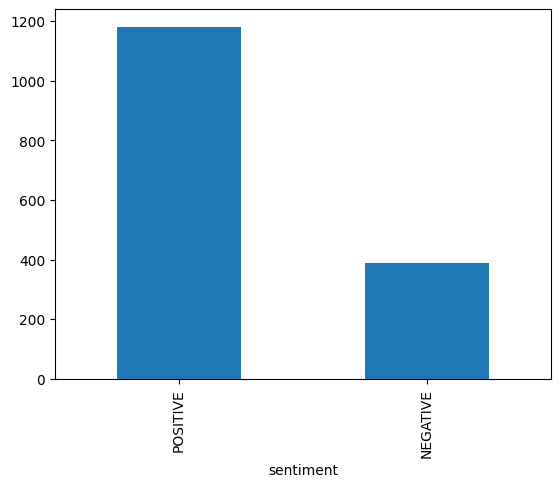

In [26]:
import matplotlib.pyplot as plt
rev_app_df['sentiment'].value_counts().plot(kind='bar');

In [27]:
file_name = 'revApp_reviews.xlsx'
rev_app_df.to_excel(file_name, index=False)

In [28]:
pd.read_excel('revApp_reviews.xlsx').head(1)

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,content_new,result,sentiment
0,7f75a28a-e546-437e-ae8a-58cd0ed9db7e,Vivian,https://play-lh.googleusercontent.com/a/ACg8oc...,why debt 20 from every transaction,0.997633,0,1.5.0,2024-12-30 20:31:14,NaN,NaT,1.5.0,why debt 20 from every transaction,"[{'label': 'NEGATIVE', 'score': 0.997632980346...",NEGATIVE


In [16]:
# pip install mysql-connector-python --upgrade

   ---------------------------------------- 0.0/16.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/16.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/16.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/16.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/16.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/16.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/16.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/16.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/16.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/16.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/16.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/16.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/16.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/16.1 MB ? eta -:--:--
   -----------------

In [29]:
dataframe=rev_app_df

In [30]:
data = [tuple(row) for row in rev_app_df.to_numpy()]

In [31]:
# Check if any column contains lists
for col in dataframe.columns:
    if dataframe[col].apply(lambda x: isinstance(x, list)).any():
        print(f"Column '{col}' contains list values.")

Column 'result' contains list values.


In [32]:
# Flatten lists into comma-separated strings
for col in dataframe.columns:
    dataframe[col] = dataframe[col].apply(
        lambda x: ', '.join(map(str, x)) if isinstance(x, list) else x
    )

In [33]:
# Replace NaN with None
dataframe = dataframe.where(pd.notnull(dataframe), None)

In [35]:
import mysql.connector
import pandas as pd

DB_CONFIG = {
    'host': 'localhost',
    'port': 3306,
    'user': 'root',
    'password': '12345',
    'database': 'RevApp_reviews'
}

def create_connection():
    try:
        conn = mysql.connector.connect(**DB_CONFIG)
        print("Connected to MySQL Database!")
        return conn
    except mysql.connector.Error as err:
        if err.errno == 1049:
            print(f"Database '{DB_CONFIG['database']}' does not exist. Creating it...")
            temp_config = DB_CONFIG.copy()
            temp_config.pop('database')
            conn = mysql.connector.connect(**temp_config)
            cursor = conn.cursor()
            cursor.execute(f"CREATE DATABASE {DB_CONFIG['database']}")
            print(f"Database '{DB_CONFIG['database']}' created successfully!")
            cursor.close()
            conn.close()
            conn = mysql.connector.connect(**DB_CONFIG)
            return conn
        else:
            print(f"Error: {err}")
            return None

def infer_mysql_data_type(dtype, column_name=None):
    if column_name == "reviewId":  # Ensure `reviewId` is always VARCHAR(255)
        return "VARCHAR(255)"
    elif pd.api.types.is_integer_dtype(dtype):
        return "INT"
    elif pd.api.types.is_float_dtype(dtype):
        return "FLOAT"
    elif pd.api.types.is_datetime64_any_dtype(dtype):
        return "DATETIME"
    else:
        return "TEXT"

def create_table_from_dataframe(cursor, df, table_name):
    columns_with_types = []
    for col in df.columns:
        dtype = df[col].dtype
        mysql_type = infer_mysql_data_type(dtype, column_name=col)
        columns_with_types.append(f"`{col}` {mysql_type}")

    create_table_query = f"""
    CREATE TABLE IF NOT EXISTS `{table_name}` (
        {", ".join(columns_with_types)},
        PRIMARY KEY (`reviewId`)
    )
    """
    cursor.execute(create_table_query)
    print(f"Table `{table_name}` created successfully!")

def insert_data_from_dataframe(cursor, conn, df, table_name):
    columns = ", ".join([f"`{col}`" for col in df.columns])
    placeholders = ", ".join(["%s"] * len(df.columns))
    insert_query = f"""
    INSERT INTO `{table_name}` ({columns})
    VALUES ({placeholders})
    ON DUPLICATE KEY UPDATE {", ".join([f"`{col}` = VALUES(`{col}`)" for col in df.columns])}
    """

    for col in df.columns:
        df[col] = df[col].apply(
            lambda x: ', '.join(map(str, x)) if isinstance(x, list) else x
        )
    df = df.where(pd.notnull(df), None)

    data = [tuple(row) for row in df.to_numpy()]
    cursor.executemany(insert_query, data)
    conn.commit()
    print(f"{cursor.rowcount} rows inserted/updated successfully!")

def main():
    conn = create_connection()
    if conn is None:
        print("Failed to connect to the database. Exiting.")
        return

    cursor = conn.cursor()

    global dataframe
    if 'dataframe' not in globals():
        print("DataFrame `dataframe` is not defined. Exiting.")
        return

    datetime_columns = ['at', 'repliedAt']
    for col in datetime_columns:
        if col in dataframe.columns:
            dataframe[col] = pd.to_datetime(dataframe[col], errors='coerce')

    table_name = "RevApp_reviews"
    create_table_from_dataframe(cursor, dataframe, table_name)
    insert_data_from_dataframe(cursor, conn, dataframe, table_name)

    cursor.close()
    conn.close()
    print("MySQL connection closed.")

if __name__ == "__main__":
    dataframe = dataframe

    main()


Database 'RevApp_reviews' does not exist. Creating it...
Database 'RevApp_reviews' created successfully!
Table `RevApp_reviews` created successfully!
1570 rows inserted/updated successfully!
MySQL connection closed.
